# Correlation between taxes and price per m2

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import numpy as np
from scipy import stats

# Settings for seaborn
sns.set_theme(style="ticks", palette="pastel")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Import Tax Data

In [2]:
df_steuerfuss = pd.read_excel('../03_Collecting Data/01_Web API/estv_income_rates.xlsx', 
                           sheet_name='Export')[['BfS_Id', 'Kanton', 'Gemeinde', 'Kantonssteuerfuss', 'Gemeindesteuerfuss']]

print(df_steuerfuss.shape)

steuersatz_kombiniert = []

for index,row in df_steuerfuss.iterrows():
    number = row['Gemeindesteuerfuss'] + row['Kantonssteuerfuss']
    steuersatz_kombiniert.append(number)

df_steuerfuss['steuersatz_kombiniert'] = steuersatz_kombiniert

# Show first rows in dataframe
df_steuerfuss.sort_values(by=['steuersatz_kombiniert'], ascending=False).head(20)

(2149, 5)


,BfS_Id,Kanton,Gemeinde,Kantonssteuerfuss,Gemeindesteuerfuss,steuersatz_kombiniert
632,1403,OW,Giswil,335.0,500.0,835.0
634,1405,OW,Lungern,335.0,495.0,830.0
630,1401,OW,Alpnach,335.0,485.0,820.0
633,1404,OW,Kerns,335.0,470.0,805.0
635,1406,OW,Sachseln,335.0,470.0,805.0
1015,3002,AR,Hundwil,330.0,470.0,800.0
631,1402,OW,Engelberg,335.0,465.0,800.0
1024,3025,AR,Trogen,330.0,450.0,780.0
1027,3007,AR,Waldstatt,330.0,430.0,760.0
1019,3004,AR,Schwellbrunn,330.0,420.0,750.0


In [3]:
#Make sure there are no duplicated values so the mean per municipality isn't distorted
len(df_steuerfuss['BfS_Id'])-len(df_steuerfuss['BfS_Id'].drop_duplicates())

0

### Import Apartment and House Data

In [4]:
df = pd.read_csv('../04_Preparing & Storing Data/dataset_homegate_enriched.csv', sep=',', encoding='utf-8')
df = df.drop('Unnamed: 0', axis=1)

# Show categories of 'Type'
print(df['type'].value_counts())

# Show first rows in dataframe
df.head()

Wohnung    6214
Haus       5088
Name: type, dtype: int64


,web-scraper-order,web-scraper-start-url,price_raw,qubic_meter_raw,rooms_raw,full_address,description,type,rooms,area,...,central,price_per_m2,price_cat,area_cat,Ortschaftsname,BfS_Id,Kantonskürzel,Kantonssteuerfuss,Gemeindesteuerfuss,steuersatz_kombiniert
0,1672673926-34302,https://www.homegate.ch/kaufen/wohnung/land-sc...,1’000’000.–,110m2,3.5Zi,6963 Pregassona,IN ZONA RESIDENZIALE TRANQUILLA E SOLEGGIATA P...,Wohnung,3.5,110,...,0.0,9090.91,high,100-149,Pregassona,5192,TI,97.0,77.0,174.0
1,1672673926-34301,https://www.homegate.ch/kaufen/wohnung/land-sc...,500’000.–,80m2,3.5Zi,"Via Ceresio 39A, 6963 Pregassona","A PREGASSONA, PROPONIAMO IN VENDITA UN LUMINOS...",Wohnung,3.5,80,...,0.0,6250.00,medium,50 - 99,Pregassona,5192,TI,97.0,77.0,174.0
2,1672673272-29951,https://www.homegate.ch/kaufen/wohnung/land-sc...,1’200’000.–,141m2,4.5Zi,"Via Vedo 3, 6963 Cureggia","RESIDENZE GOLD & SILVER, 2 PALAZZINE OGNUNA CO...",Wohnung,4.5,141,...,1.0,8510.64,medium,100-149,Pregassona,5192,TI,97.0,77.0,174.0
3,1672673272-29952,https://www.homegate.ch/kaufen/wohnung/land-sc...,2’360’000.–,238m2,4.5Zi,"Via vedo 3, 6963 Cureggia","RESIDENZE GOLD & SILVER, 2 PALAZZINE OGNUNA CO...",Wohnung,4.5,238,...,1.0,9915.97,high,100-149,Pregassona,5192,TI,97.0,77.0,174.0
4,1672673816-33571,https://www.homegate.ch/kaufen/wohnung/land-sc...,270’000.–,30m2,1Zi,"via Ceresio, 6963 Pregassona",A PREGASSONA COMODISSIMO MONOLOCALE AL SECONDO...,Wohnung,1.0,30,...,0.0,9000.00,medium,0 - 49,Pregassona,5192,TI,97.0,77.0,174.0


## Correlation between taxes and price per m2 for cantons

### Create pivot table with mean tax rate per canton

In [5]:
# Using pivot_table to reshape the data and calculate means 
df_mean_tax = pd.pivot_table(df_steuerfuss[['Kanton', 'steuersatz_kombiniert']],
               index=['Kanton'],
               values=['steuersatz_kombiniert'],
               aggfunc=[np.mean])

df_mean_tax.columns = df_mean_tax.columns.droplevel(0)
df_mean_tax.columns.name = None
df_mean_tax = df_mean_tax.sort_values(by=['steuersatz_kombiniert'])
df_mean_tax = df_mean_tax.reset_index()
df_mean_tax


,Kanton,steuersatz_kombiniert
0,BS,92.500000
1,GL,118.366667
2,ZG,138.818182
3,BL,159.054651
4,AI,173.333333
5,FR,175.826984
6,TI,180.018519
7,GE,189.155333
8,SH,189.576923
9,GR,189.774257


### Create pivot table with mean price per m2 per canton

In [6]:
# Using pivot_table to reshape the data and calculate means 
df_mean_price_per_m2 = pd.pivot_table(df[['Kantonskürzel', 'price_per_m2']],
               index=['Kantonskürzel'],
               values=['price_per_m2'],
               aggfunc=[np.mean])

df_mean_price_per_m2.columns = df_mean_price_per_m2.columns.droplevel(0)
df_mean_price_per_m2.columns.name = None
df_mean_price_per_m2 = df_mean_price_per_m2.sort_values(by=['price_per_m2'])
df_mean_price_per_m2 = df_mean_price_per_m2.reset_index()
df_mean_price_per_m2.rename(columns={'Kantonskürzel': 'Kanton'}, inplace=True)
df_mean_price_per_m2

,Kanton,price_per_m2
0,JU,4027.854051
1,GL,5104.480714
2,SO,5858.977946
3,NE,5972.686136
4,SH,6119.461000
5,AR,6279.188387
6,FR,6418.688121
7,SG,6804.912923
8,TI,7056.931364
9,TG,7071.784702


### Merge the two dataframes

In [7]:
df_combined = df_mean_tax.merge(df_mean_price_per_m2, on='Kanton')
df_combined

,Kanton,steuersatz_kombiniert,price_per_m2
0,BS,92.500000,11893.986988
1,GL,118.366667,5104.480714
2,ZG,138.818182,15235.427500
3,BL,159.054651,8735.117752
4,AI,173.333333,8258.487143
5,FR,175.826984,6418.688121
6,TI,180.018519,7056.931364
7,GE,189.155333,14692.810912
8,SH,189.576923,6119.461000
9,GR,189.774257,11043.322323


### Scatterplot to visualise the correlation between the mean price per m2 and taxes for cantons

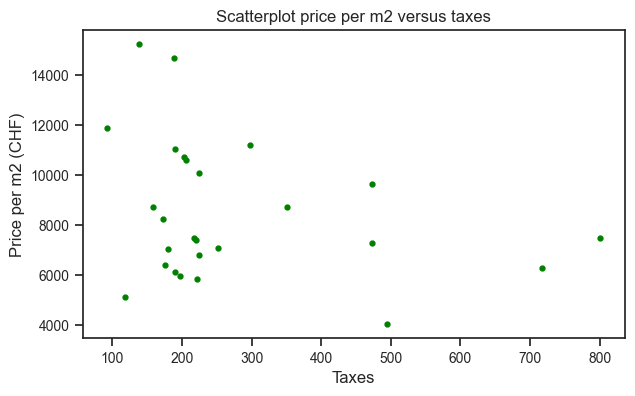

In [8]:
# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_combined['steuersatz_kombiniert'], 
         df_combined['price_per_m2'], 
         'o', 
         markersize=3.5,
         color="green")

# Add title and axes labels
plt.title('Scatterplot price per m2 versus taxes', fontsize=12)
plt.xlabel('Taxes', fontsize=12)
plt.ylabel('Price per m2 (CHF)', fontsize=12)


# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

In [9]:
# Perform Pearsons correlation
res = scipy.stats.pearsonr(df_combined['steuersatz_kombiniert'], df_combined['price_per_m2'])

# Print result
print(f'Pearsons correlation coefficient (r): {res[0]:.4f}')
print(f'p-value: {res[1]:.20f}')

Pearsons correlation coefficient (r): -0.2805
p-value: 0.16515791494820009078


### Interpretation

The correlation coefficiency value r of -0.28 shows a weak negative relation between the tax rate and the price per m2. With the p-value being above 0.05 the correlation coefficient is statistically insignificant though. It's important to note that on a cantonal level we're only evaluating 26 datapoints.

## Correlation between taxes and price per m2 for municipalities

### Create pivot table with mean tax rate per municipality

In [10]:
# Using pivot_table to reshape the data and calculate means 
df_mean_tax_bfs = pd.pivot_table(df_steuerfuss[['BfS_Id', 'steuersatz_kombiniert']],
               index=['BfS_Id'],
               values=['steuersatz_kombiniert'],
               aggfunc=[np.mean])

df_mean_tax_bfs.columns = df_mean_tax_bfs.columns.droplevel(0)
df_mean_tax_bfs.columns.name = None
df_mean_tax_bfs = df_mean_tax_bfs.sort_values(by=['steuersatz_kombiniert'])
df_mean_tax_bfs = df_mean_tax_bfs.reset_index()
df_mean_tax_bfs


,BfS_Id,steuersatz_kombiniert
0,2702,87.5
1,2703,90.0
2,2701,100.0
3,1632,115.2
4,1631,119.2
...,...,...
2144,1404,805.0
2145,1406,805.0
2146,1401,820.0
2147,1405,830.0


### Create pivot table with mean price per m2 per municipality

In [11]:
# Using pivot_table to reshape the data and calculate means 
df_mean_price_per_m2_bfs = pd.pivot_table(df[['BfS_Id', 'price_per_m2']],
               index=['BfS_Id'],
               values=['price_per_m2'],
               aggfunc=[np.mean])

df_mean_price_per_m2_bfs.columns = df_mean_price_per_m2_bfs.columns.droplevel(0)
df_mean_price_per_m2_bfs.columns.name = None
df_mean_price_per_m2_bfs = df_mean_price_per_m2_bfs.sort_values(by=['price_per_m2'])
df_mean_price_per_m2_bfs = df_mean_price_per_m2_bfs.reset_index()
df_mean_price_per_m2_bfs

,BfS_Id,price_per_m2
0,6177,1111.110000
1,6753,1181.820000
2,5315,1222.220000
3,5076,1425.000000
4,544,1759.260000
...,...,...
1242,135,22631.643333
1243,3789,24729.730000
1244,3787,24742.270000
1245,248,28689.660000


### Merge the two dataframes

In [12]:
df_combined_bfs = df_mean_tax_bfs.merge(df_mean_price_per_m2_bfs, on='BfS_Id')
df_combined_bfs

,BfS_Id,steuersatz_kombiniert,price_per_m2
0,2703,90.0,12048.441667
1,2701,100.0,11881.951558
2,1632,115.2,5016.565333
3,1631,119.2,3548.948333
4,1630,120.7,5611.715238
...,...,...,...
1242,3001,740.0,5046.211111
1243,3002,800.0,6721.112000
1244,1402,800.0,5421.905000
1245,1401,820.0,7770.262500


### Scatterplot to visualise the correlation between the mean price per m2 and taxes for municipalities

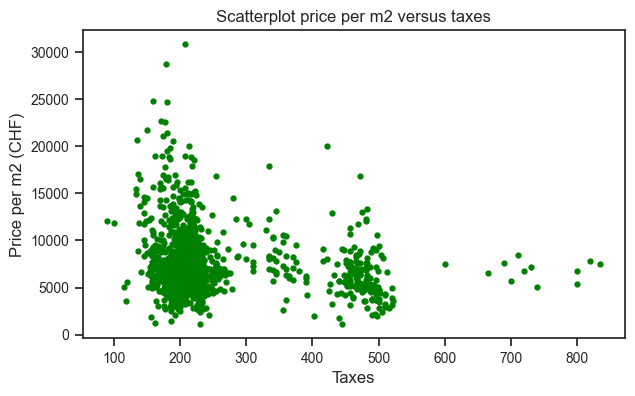

In [13]:
# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_combined_bfs['steuersatz_kombiniert'], 
         df_combined_bfs['price_per_m2'], 
         'o', 
         markersize=3.5,
         color="green")

# Add title and axes labels
plt.title('Scatterplot price per m2 versus taxes', fontsize=12)
plt.xlabel('Taxes', fontsize=12)
plt.ylabel('Price per m2 (CHF)', fontsize=12)


# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

In [14]:
# Perform Pearsons correlation
res = scipy.stats.pearsonr(df_combined_bfs['steuersatz_kombiniert'], df_combined_bfs['price_per_m2'])

# Print result
print(f'Pearsons correlation coefficient (r): {res[0]:.4f}')
print(f'p-value: {res[1]:.20f}')

Pearsons correlation coefficient (r): -0.1893
p-value: 0.00000000001613622060


### Interpretation

Given the visualisation of the scatterplot as well as the Pearson correlation coefficient (r) we can see, that the data only shows a weak negative relationship between the mean price per m2 and the respective tax on a municipality level. The p-value is below 0.05 and the correlation coefficient is therefore low but statistically significant.